In [1]:
# sets the path to the root of the repository
from pathlib import Path
import sys
import os

root_path = os.path.dirname(os.path.abspath(''))
sys.path.append(str(root_path))
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from prediction_head.data import get_regression_dataset, get_binary_dataset, get_multiclass_dataset, get_multilabel_dataset, get_zeroinflated_dataset
from prediction_head.GLM import GLM, train_one_epoch, train_loop
from prediction_head.plot import plot_regression_distribution, plot_classification_distribution, plot_ground_truth_vs_predictions


## Binary (n_features=25, n_informative=20, n_redundant=5)

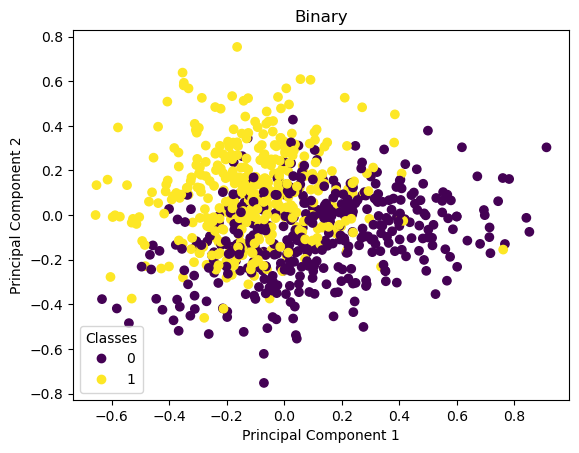

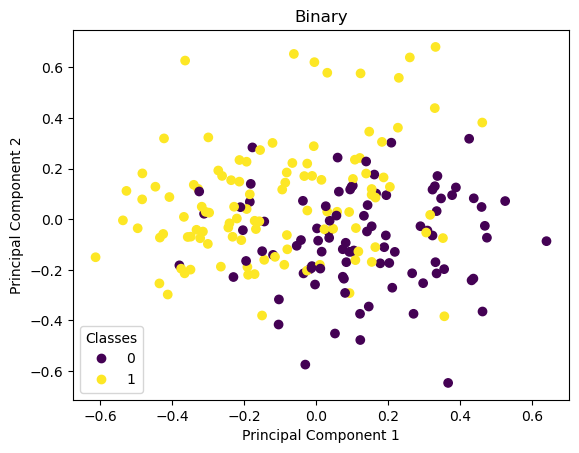

{'binary': {'roc': 0.5644658828258466, 'acc': 0.54}}


In [3]:
dataloaders: dict = {"binary": get_binary_dataset(n_features=25, n_informative=20)}
glm_dict = {
    "binary": {
        "input_dim": 25,
        "output_dim": 1,
        "tasktype": "binary",
        "loss_fn_index": 0,
    },
}
train_dataloader = dataloaders["binary"][0]
test_dataloader = dataloaders["binary"][1]
scaler = dataloaders["binary"][2]

# plot data (train)
plot_classification_distribution(np.array(train_dataloader.dataset.x), np.array(train_dataloader.dataset.y), title="Binary", xlabel="Principal Component 1", ylabel="Principal Component 2")
# plot data (test)
plot_classification_distribution(np.array(test_dataloader.dataset.x), np.array(test_dataloader.dataset.y), title="Binary", xlabel="Principal Component 1", ylabel="Principal Component 2")
# run ML model
results = train_loop(glm_dict, dataloaders, epochs=10)
print(results["binary"][0])